# Bienvenidos a mi proyecto de las magnificas 7. Apple, Google, Nvidia, Microsoft, Meta, Tesla y Amazon.

### A continuación, les haré un desglose de como fui analizando mis datos poco a poco.

#### **Caso**: Mi jefe me pide un analisis de datos para darle una opcion viable de donde invertir sus activos.

#### **Hipótesis**: Dos inversores entran al mundo de los stocks en el 2014. Invierten lo mismo y lo distribuyen de la misma forma en las magnificas 7. Uno se retira en el 2020 ya que no confió en ellas, mientras que el otro vende las suyas a comienzos del 2024. A quien le fue mejor? Hubo mucha diferencia?

Primero voy a importar las siguientes librerias que son las que voy a necesitar a lo largo de mi proyecto.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# overall results
# comparar valores DURANTE el 2020 (pandemia)
# comparar valores en el año 2021-2022(post-pandemia)
# competencia a largo plazo


Ahora que tengo mis librerias, y descargue la data de kaggle, pasaré estos documentos a una tabla con pandas.

In [3]:
apple = pd.read_csv("Datasets/AAPL1424.csv")
amazon = pd.read_csv("Datasets/AMZN1424.csv")
google = pd.read_csv("Datasets/GOOGL1424.csv")
meta = pd.read_csv("Datasets/META1424.csv")
microsoft = pd.read_csv("Datasets/MSFT1424.csv")
nvidia = pd.read_csv("Datasets/NVDA1424.csv")
tesla = pd.read_csv("Datasets/TSLA1424.csv")

Verifico que este funcionando.

In [4]:
apple.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,ATR (7 Days),RSI (7 Days),RSI (14 Days),EMA (50 Days),EMA (100 Days),SMA (50 Days),SMA (100 Days),Log Return,Percent Return,Cumulative Log Return,Cumulative Percent Return
0,0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296656,234684800,0.0,100.000000,100.000000,19.754642,19.754642,19.754642,19.754642,NaN,NaN,NaN,NaN
1,1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916718,392467600,0.0,0.000000,0.000000,19.737626,19.746050,19.537679,19.537679,-0.022211,-0.021966,-0.022211,-0.021966
2,2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008972,412610800,0.0,22.073647,20.727624,19.725408,19.739714,19.500476,19.500476,0.005438,0.005453,-0.016772,-0.016513
3,3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887323,317209200,0.0,16.477971,16.013941,19.708221,19.730752,19.447143,19.447143,-0.007177,-0.007152,-0.023950,-0.023664
4,4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994270,258529600,0.0,33.713672,30.893616,19.696498,19.724386,19.439572,19.439572,0.006313,0.006333,-0.017637,-0.017332


Ahora que veo que si funciona, voy a borrarle a los 7 data frames la columna llamanda "unnamed: 0", y luego comprobar que funcione.

In [5]:
# Eliminar la columna 'Unnamed: 0' de todos los DataFrames
dataframes = [apple, amazon, google, meta, microsoft, nvidia, tesla]

for df in dataframes:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# Mostrar las primeras filas para verificar que se haya eliminado la columna
for df_name, df in zip(['apple', 'amazon', 'google', 'meta', 'microsoft', 'nvidia', 'tesla'], dataframes):
    print(f"Primeras filas de {df_name}:")
    print(df.head(), "\n")


Primeras filas de apple:
         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296656   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916718   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008972   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887323   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994270   

      Volume  ATR (7 Days)  RSI (7 Days)  RSI (14 Days)  EMA (50 Days)  \
0  234684800           0.0    100.000000     100.000000      19.754642   
1  392467600           0.0      0.000000       0.000000      19.737626   
2  412610800           0.0     22.073647      20.727624      19.725408   
3  317209200           0.0     16.477971      16.013941      19.708221   
4  258529600           0.0     33.713672      30.893616      19.696498   

   EMA (100 Days)  SMA (50 Days)  SMA (100 Days)  Log Return  Percent Return  \
0       19.754642

Compruebo con Apple que la columna borrada ya no este en el data frame.

In [6]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ATR (7 Days)', 'RSI (7 Days)', 'RSI (14 Days)', 'EMA (50 Days)',
       'EMA (100 Days)', 'SMA (50 Days)', 'SMA (100 Days)', 'Log Return',
       'Percent Return', 'Cumulative Log Return', 'Cumulative Percent Return'],
      dtype='object')

Ahora voy a convertir un diccionario con las 7 compañias para luego asegurar que este usando la funcion de fechas correcta, ya que el df me esta dando fechas de Lunes a Viernes de los ultimos 10 años.

In [7]:
# Crear un diccionario con los nombres y DataFrames
dataframes_dict = {
    'apple': apple,
    'amazon': amazon,
    'google': google,
    'meta': meta,
    'microsoft': microsoft,
    'nvidia': nvidia,
    'tesla': tesla
}

# Convertir la columna de fechas a formato datetime para cada DataFrame
for name, df in dataframes_dict.items():
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar que la columna 'Date' se ha convertido correctamente
date_info = {name: df['Date'].dtype for name, df in dataframes_dict.items()}
date_samples = {name: df['Date'].head() for name, df in dataframes_dict.items()}

# Mostrar la información de los tipos de datos y algunas muestras de las fechas
date_info, date_samples


({'apple': dtype('<M8[ns]'),
  'amazon': dtype('<M8[ns]'),
  'google': dtype('<M8[ns]'),
  'meta': dtype('<M8[ns]'),
  'microsoft': dtype('<M8[ns]'),
  'nvidia': dtype('<M8[ns]'),
  'tesla': dtype('<M8[ns]')},
 {'apple': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns],
  'amazon': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns],
  'google': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns],
  'meta': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns],
  'microsoft': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns],
  'nvidia': 0   2014-01-02
  1   2014-01-03
  2   2014-01-06
  3   2014-01-07
  4   2014-01-08
  Name: Date, dtype: datetime64[ns]

Hay muchos datos analizables dentro de este tema, ahora lo que voy a hacer es filtrar nuevas tablas donde solamente me den las columnas de: Fecha, valor en el que se abre la accion, valor mas alto que llega durante x periodo de tiempo, valor mas bajo, y valor en el que cierra el periodo. (Ya sea dia, semana, mes, año, o toda su vida)

In [8]:
# Crear una nueva versión de cada DataFrame con solo las columnas seleccionadas: 'Date', 'Open', 'High', 'Low', 'Close'
filtered_dataframes = {name: df[['Date', 'Open', 'High', 'Low', 'Close']] for name, df in dataframes_dict.items()}

# Mostrar las primeras filas de cada DataFrame filtrado para confirmar
for name, df in filtered_dataframes.items():
    print(f"Primeras filas del dataset filtrado de {name}:")
    print(df.head(), "\n")


Primeras filas del dataset filtrado de apple:
        Date       Open       High        Low      Close
0 2014-01-02  19.845715  19.893929  19.715000  19.754642
1 2014-01-03  19.745001  19.775000  19.301071  19.320715
2 2014-01-06  19.194643  19.528570  19.057142  19.426071
3 2014-01-07  19.440001  19.498571  19.211430  19.287144
4 2014-01-08  19.243214  19.484285  19.238930  19.409286 

Primeras filas del dataset filtrado de amazon:
        Date       Open     High        Low      Close
0 2014-01-02  19.940001  19.9680  19.701000  19.898500
1 2014-01-03  19.914499  20.1355  19.811001  19.822001
2 2014-01-06  19.792500  19.8500  19.421000  19.681499
3 2014-01-07  19.752001  19.9235  19.714500  19.901501
4 2014-01-08  19.923500  20.1500  19.802000  20.096001 

Primeras filas del dataset filtrado de google:
        Date       Open       High        Low      Close
0 2014-01-02  27.914413  27.971722  27.734234  27.855856
1 2014-01-03  27.902903  27.951200  27.650902  27.652653
2 2014-01-06 

Ya que ahora voy a comenzar a trabajar con estos df como mis principales, les asignare el nombre con el que mas facil se me haga trabajar. 

In [9]:
# Crear y asignar nombres a las versiones filtradas de cada DataFrame
apple_filtered = filtered_dataframes['apple']
amazon_filtered = filtered_dataframes['amazon']
google_filtered = filtered_dataframes['google']
meta_filtered = filtered_dataframes['meta']
microsoft_filtered = filtered_dataframes['microsoft']
nvidia_filtered = filtered_dataframes['nvidia']
tesla_filtered = filtered_dataframes['tesla']

# Mostrar las primeras filas de cada DataFrame filtrado para confirmar los resultados
for name, df in zip(['apple_filtered', 'amazon_filtered', 'google_filtered', 'meta_filtered', 
                     'microsoft_filtered', 'nvidia_filtered', 'tesla_filtered'], 
                    [apple_filtered, amazon_filtered, google_filtered, meta_filtered, 
                     microsoft_filtered, nvidia_filtered, tesla_filtered]):
    print(f"Primeras filas del dataset {name}:")
    print(df.head(), "\n")


Primeras filas del dataset apple_filtered:
        Date       Open       High        Low      Close
0 2014-01-02  19.845715  19.893929  19.715000  19.754642
1 2014-01-03  19.745001  19.775000  19.301071  19.320715
2 2014-01-06  19.194643  19.528570  19.057142  19.426071
3 2014-01-07  19.440001  19.498571  19.211430  19.287144
4 2014-01-08  19.243214  19.484285  19.238930  19.409286 

Primeras filas del dataset amazon_filtered:
        Date       Open     High        Low      Close
0 2014-01-02  19.940001  19.9680  19.701000  19.898500
1 2014-01-03  19.914499  20.1355  19.811001  19.822001
2 2014-01-06  19.792500  19.8500  19.421000  19.681499
3 2014-01-07  19.752001  19.9235  19.714500  19.901501
4 2014-01-08  19.923500  20.1500  19.802000  20.096001 

Primeras filas del dataset google_filtered:
        Date       Open       High        Low      Close
0 2014-01-02  27.914413  27.971722  27.734234  27.855856
1 2014-01-03  27.902903  27.951200  27.650902  27.652653
2 2014-01-06  27.85310

Como es una data muy extensa, voy a filtrar los df que ya tengo y creare unas nnuevas varibles que me den los valores mensuales (con la media) en vez de diarios.

In [10]:
# Crear versiones resumidas por mes para cada DataFrame filtrado
apple_monthly = apple_filtered.resample('M', on='Date').mean()
amazon_monthly = amazon_filtered.resample('M', on='Date').mean()
google_monthly = google_filtered.resample('M', on='Date').mean()
meta_monthly = meta_filtered.resample('M', on='Date').mean()
microsoft_monthly = microsoft_filtered.resample('M', on='Date').mean()
nvidia_monthly = nvidia_filtered.resample('M', on='Date').mean()
tesla_monthly = tesla_filtered.resample('M', on='Date').mean()

# Mostrar las primeras filas de cada DataFrame resumido para confirmar los resultados
for name, df in zip(['apple_monthly', 'amazon_monthly', 'google_monthly', 'meta_monthly', 
                     'microsoft_monthly', 'nvidia_monthly', 'tesla_monthly'], 
                    [apple_monthly, amazon_monthly, google_monthly, meta_monthly, 
                     microsoft_monthly, nvidia_monthly, tesla_monthly]):
    print(f"Primeras filas del dataset {name}:")
    print(df.head(), "\n")


Primeras filas del dataset apple_monthly:
                 Open       High        Low      Close
Date                                                  
2014-01-31  19.217891  19.387313  19.038061  19.194490
2014-02-28  18.775752  18.956203  18.647368  18.806429
2014-03-31  19.056905  19.159065  18.931105  19.043367
2014-04-30  19.288639  19.441037  19.152228  19.324082
2014-05-31  21.475068  21.656173  21.369031  21.542704 

Primeras filas del dataset amazon_monthly:
                 Open       High        Low      Close
Date                                                  
2014-01-31  19.798643  19.993595  19.527477  19.743167
2014-02-28  17.718158  17.905000  17.460026  17.716842
2014-03-31  18.250476  18.395500  17.958500  18.131524
2014-04-30  16.156619  16.336119  15.787190  16.082071
2014-05-31  15.123714  15.308833  14.939762  15.147691 

Primeras filas del dataset google_monthly:
                 Open       High        Low      Close
Date                                       

/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/1505352151.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_monthly = apple_filtered.resample('M', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/1505352151.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amazon_monthly = amazon_filtered.resample('M', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/1505352151.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  google_monthly = google_filtered.resample('M', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/1505352151.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meta_monthly = meta_filtered.resample('M', on='Date').mean()
/var/folders/5

Haré el mismo paso anterior pero ahora filtrare para crear variables anuales. (Tambien con la media)

In [11]:
# Crear versiones resumidas por año para cada DataFrame filtrado
apple_annual = apple_filtered.resample('Y', on='Date').mean()
amazon_annual = amazon_filtered.resample('Y', on='Date').mean()
google_annual = google_filtered.resample('Y', on='Date').mean()
meta_annual = meta_filtered.resample('Y', on='Date').mean()
microsoft_annual = microsoft_filtered.resample('Y', on='Date').mean()
nvidia_annual = nvidia_filtered.resample('Y', on='Date').mean()
tesla_annual = tesla_filtered.resample('Y', on='Date').mean()

# Mostrar las primeras filas de cada DataFrame resumido para confirmar los resultados
for name, df in zip(['apple_annual', 'amazon_annual', 'google_annual', 'meta_annual', 
                     'microsoft_annual', 'nvidia_annual', 'tesla_annual'], 
                    [apple_annual, amazon_annual, google_annual, meta_annual, 
                     microsoft_annual, nvidia_annual, tesla_annual]):
    print(f"Primeras filas del dataset {name}:")
    print(df.head(), "\n")


Primeras filas del dataset apple_annual:
                 Open       High        Low      Close
Date                                                  
2014-12-31  23.054958  23.253166  22.868885  23.066164
2015-12-31  30.043938  30.311131  29.715774  30.010000
2016-12-31  26.126944  26.356796  25.922569  26.151002
2017-12-31  37.611225  37.851514  37.371912  37.637769
2018-12-31  47.277859  47.748526  46.795877  47.263357 

Primeras filas del dataset amazon_annual:
                 Open       High        Low      Close
Date                                                  
2014-12-31  16.639923  16.815877  16.427272  16.627552
2015-12-31  23.906248  24.159812  23.644107  23.906915
2016-12-31  34.987829  35.290248  34.632312  34.976157
2017-12-31  48.413781  48.725938  48.036703  48.408351
2018-12-31  82.203635  83.141992  80.992026  82.086309 

Primeras filas del dataset google_annual:
                 Open       High        Low      Close
Date                                          

/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/3611632669.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  apple_annual = apple_filtered.resample('Y', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/3611632669.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  amazon_annual = amazon_filtered.resample('Y', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/3611632669.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_annual = google_filtered.resample('Y', on='Date').mean()
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/3611632669.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  meta_annual = meta_filtered.resample('Y', on='Date').mean()
/var/folders/5d/ff

Compruebo que funcione

In [12]:
apple_annual

,Open,High,Low,Close
Date,,,,
2014-12-31,23.054958,23.253166,22.868885,23.066164
2015-12-31,30.043938,30.311131,29.715774,30.010000
2016-12-31,26.126944,26.356796,25.922569,26.151002
2017-12-31,37.611225,37.851514,37.371912,37.637769
2018-12-31,47.277859,47.748526,46.795877,47.263357
2019-12-31,51.967272,52.457927,51.567907,52.063988
2020-12-31,95.267668,96.661769,93.912796,95.347075
2021-12-31,140.861866,142.347818,139.474087,140.989365
2022-12-31,154.802709,156.907809,152.691315,154.835060


Para resumir un poco la data, y empenzar mostrando lo que yo considero mas importante basado en la historia de cada empresa, voy a crearle un grafico a cada una de las empresas, indicando el valor de cierre anual en cada una de ellas, para poder notar su evolucion en los ultimos 10 años.

Empiezo por crear una tabla que me entregue solamente Apple anual y su columna de 'Close'.
Luego voy a comprobar que funcione.

Empezare a llamar cada una de las empresas por su abreviacion dentro del mundo de stocks, como por ejemplo Apple: AAPL.

In [29]:
# Crear un nuevo DataFrame que muestre solo el año y la columna 'Close_AAPL' para Apple
apple_grafico_general = apple_annual[['Close_AAPL']].copy()

# Convertir el índice 'Date' en una columna 'Year' y mantener solo el año
apple_grafico_general['Year'] = apple_grafico_general.index.year

# Reorganizar el DataFrame para mostrar primero el 'Year' y luego el 'Close_AAPL'
apple_grafico_general = apple_grafico_general[['Year', 'Close_AAPL']]

# Mostrar las primeras filas del nuevo DataFrame
print(apple_grafico_general.head())


            Year  Close_AAPL
Date                        
2014-12-31  2014   23.066164
2015-12-31  2015   30.010000
2016-12-31  2016   26.151002
2017-12-31  2017   37.637769
2018-12-31  2018   47.263357


Ahora que si me funciono, crearé una funcion en la que me haga lo mismo para el resto de las empresas.

In [30]:
# Crear un nuevo DataFrame que muestre solo el año y la columna 'Close' para cada compañía

def create_grafico_general(df, close_column, company_name):
    company_grafico_general = df[[close_column]].copy()
    company_grafico_general['Year'] = company_grafico_general.index.year
    company_grafico_general = company_grafico_general[['Year', close_column]]
    company_grafico_general.columns = ['Year', f'Close_{company_name}']
    return company_grafico_general

# Aplicar la función para cada compañía
apple_grafico_general = create_grafico_general(apple_annual, 'Close_AAPL', 'AAPL')
amazon_grafico_general = create_grafico_general(amazon_annual, 'Close_AMZN', 'AMZN')
google_grafico_general = create_grafico_general(google_annual, 'Close_GOOGL', 'GOOGL')
meta_grafico_general = create_grafico_general(meta_annual, 'Close_META', 'META')
microsoft_grafico_general = create_grafico_general(microsoft_annual, 'Close_MSFT', 'MSFT')
nvidia_grafico_general = create_grafico_general(nvidia_annual, 'Close_NVDA', 'NVDA')
tesla_grafico_general = create_grafico_general(tesla_annual, 'Close_TSLA', 'TSLA')

# Puedes mostrar cualquiera de los DataFrames así:
print(apple_grafico_general.head())


            Year  Close_AAPL
Date                        
2014-12-31  2014   23.066164
2015-12-31  2015   30.010000
2016-12-31  2016   26.151002
2017-12-31  2017   37.637769
2018-12-31  2018   47.263357


Ahora crearé graficos que muestren la evolucion de cada unoa de ellas, como lo mencione antes.

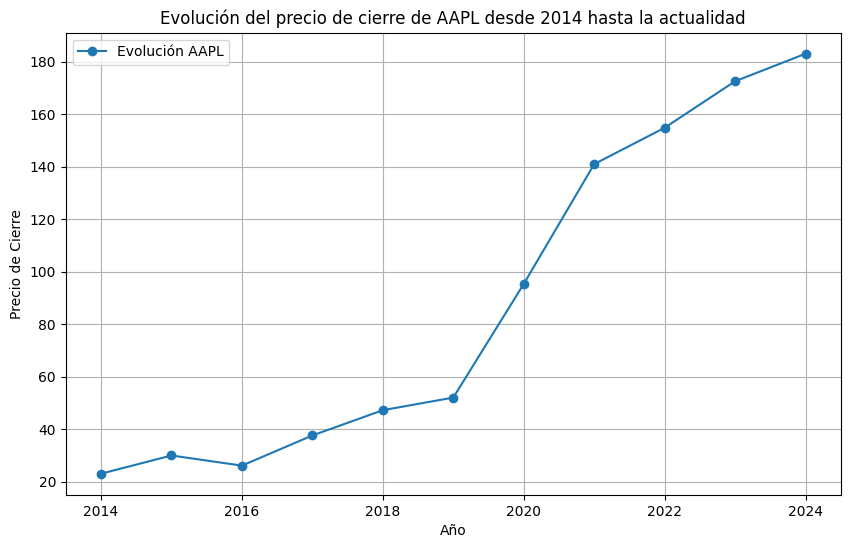

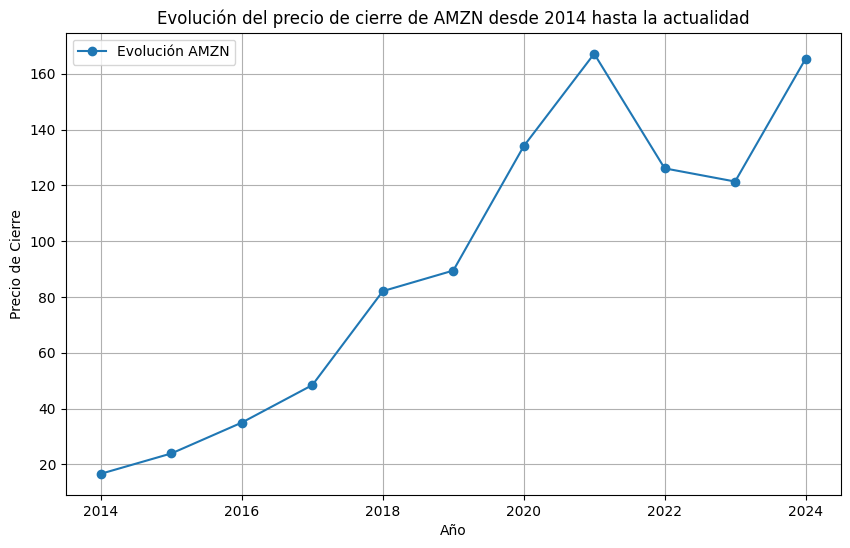

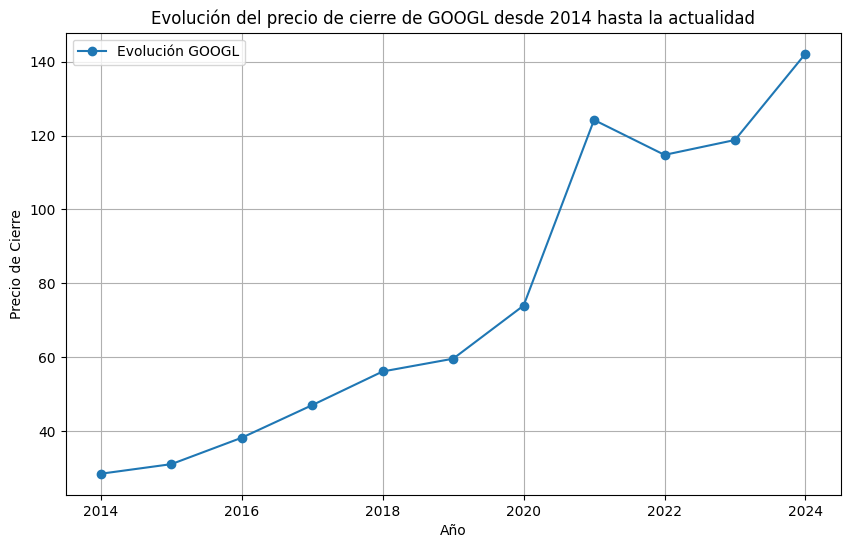

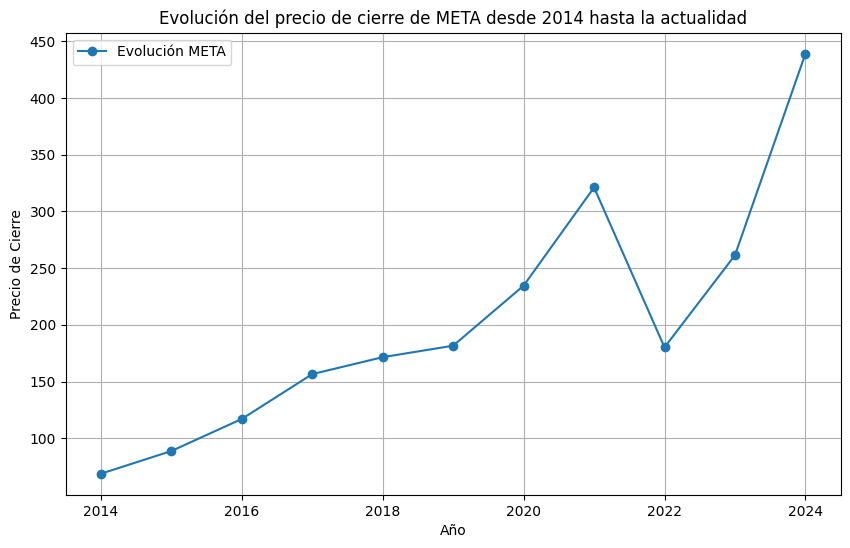

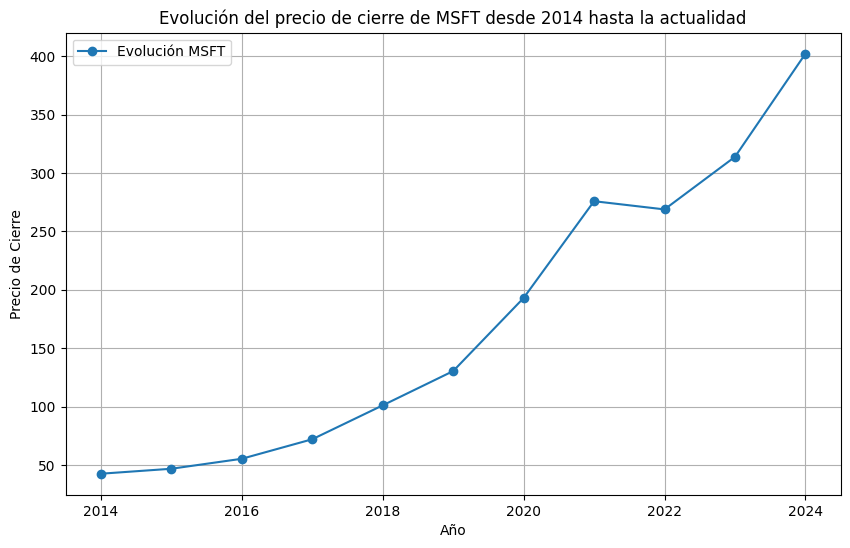

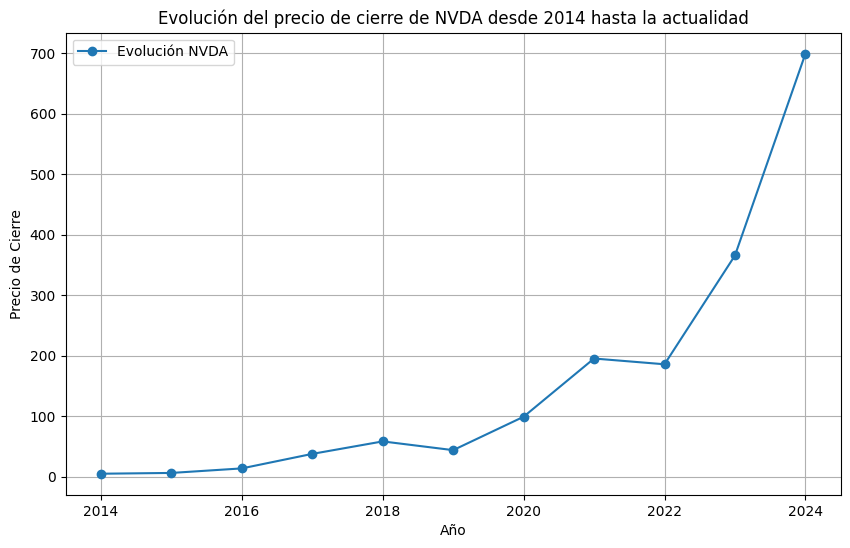

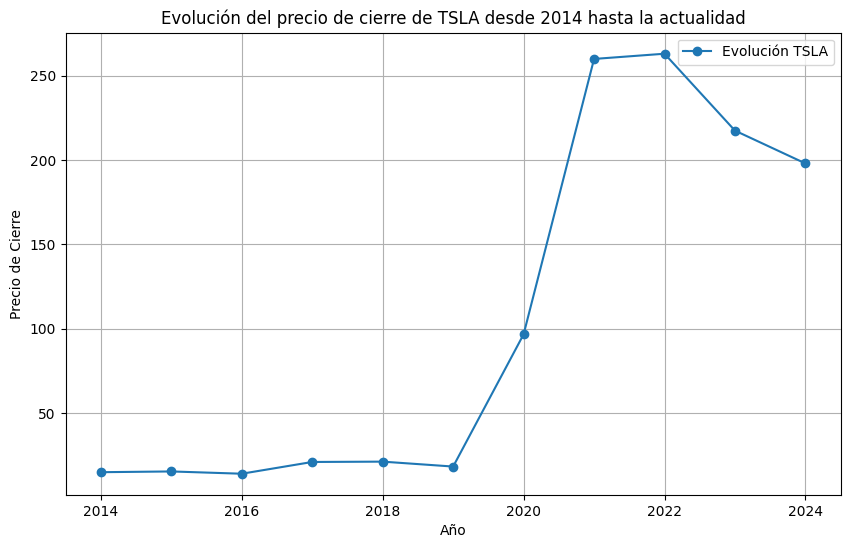

In [31]:
import matplotlib.pyplot as plt

# Función para graficar la evolución del 'Close' de una compañía
def plot_company_close_evolution(df, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[f'Close_{company_name}'], marker='o', linestyle='-', label=f'Evolución {company_name}')
    plt.title(f'Evolución del precio de cierre de {company_name} desde 2014 hasta la actualidad')
    plt.xlabel('Año')
    plt.ylabel('Precio de Cierre')
    plt.grid(True)
    plt.legend()
    plt.show()

# Graficar la evolución del 'Close' para cada compañía
plot_company_close_evolution(apple_grafico_general, 'AAPL')
plot_company_close_evolution(amazon_grafico_general, 'AMZN')
plot_company_close_evolution(google_grafico_general, 'GOOGL')
plot_company_close_evolution(meta_grafico_general, 'META')
plot_company_close_evolution(microsoft_grafico_general, 'MSFT')
plot_company_close_evolution(nvidia_grafico_general, 'NVDA')
plot_company_close_evolution(tesla_grafico_general, 'TSLA')


Ahora que ya tengo el resultado de los ultimos años para cada una de ellas, voy a crear un df, haciendole merge a los 7 DataFrames anuales y luego graficarlo.

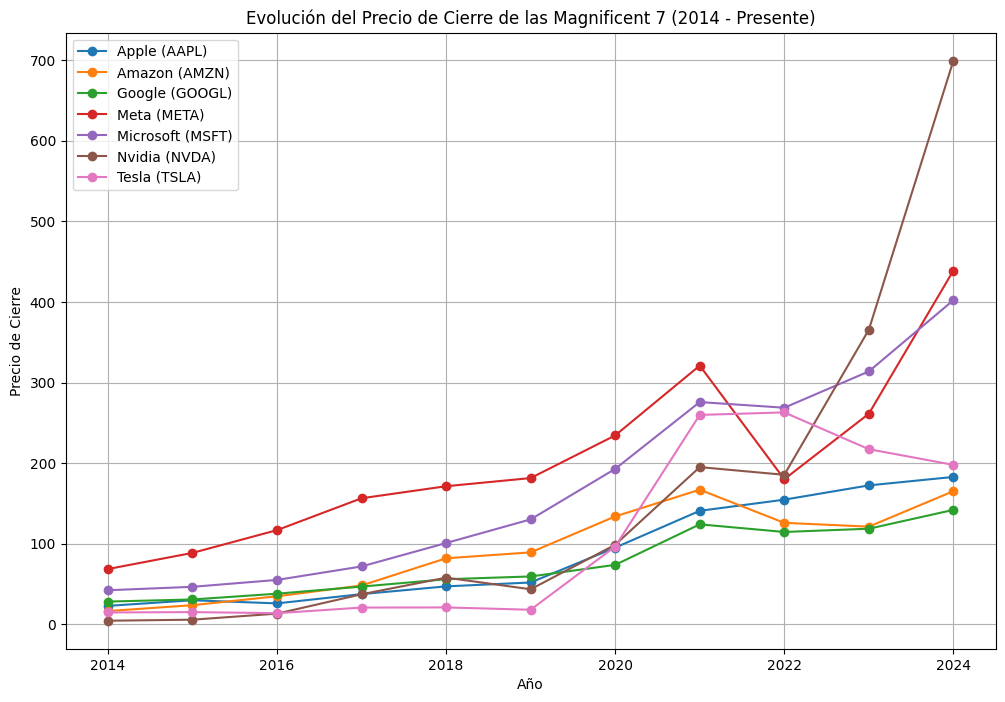

In [32]:
# Hacer merge de los DataFrames en base al 'Year'
merged_df = apple_grafico_general.merge(amazon_grafico_general, on='Year') \
                                 .merge(google_grafico_general, on='Year') \
                                 .merge(meta_grafico_general, on='Year') \
                                 .merge(microsoft_grafico_general, on='Year') \
                                 .merge(nvidia_grafico_general, on='Year') \
                                 .merge(tesla_grafico_general, on='Year')

# Graficar todas las compañías en un solo gráfico
plt.figure(figsize=(12, 8))

# Graficar cada compañía
plt.plot(merged_df['Year'], merged_df['Close_AAPL'], marker='o', linestyle='-', label='Apple (AAPL)')
plt.plot(merged_df['Year'], merged_df['Close_AMZN'], marker='o', linestyle='-', label='Amazon (AMZN)')
plt.plot(merged_df['Year'], merged_df['Close_GOOGL'], marker='o', linestyle='-', label='Google (GOOGL)')
plt.plot(merged_df['Year'], merged_df['Close_META'], marker='o', linestyle='-', label='Meta (META)')
plt.plot(merged_df['Year'], merged_df['Close_MSFT'], marker='o', linestyle='-', label='Microsoft (MSFT)')
plt.plot(merged_df['Year'], merged_df['Close_NVDA'], marker='o', linestyle='-', label='Nvidia (NVDA)')
plt.plot(merged_df['Year'], merged_df['Close_TSLA'], marker='o', linestyle='-', label='Tesla (TSLA)')

# Configurar el gráfico
plt.title('Evolución del Precio de Cierre de las Magnificent 7 (2014 - Presente)')
plt.xlabel('Año')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


Por motivos de errores al trabajando, voy ejecutando las columnas de vez en cuando para poder ver que todo este en orden.

In [28]:
# Revisar las columnas actuales en el DataFrame 'apple_annual'
print(apple_annual.columns)


Index(['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL'], dtype='object')


Ahora voy a editar un poco mis DataFrames usando resample. Para poder analizar la volatilidad, en vez de sacarle la media al 'High', le puse valor maximo. Por el otro lado el valor 'low' seria con el minimo. 'Open' y 'Close' si se quedaran con la media.

In [13]:
# Crear versiones resumidas por año para cada DataFrame filtrado usando el máximo y mínimo para las columnas 'High' y 'Low'
apple_annual = filtered_dataframes['apple'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
amazon_annual = filtered_dataframes['amazon'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
google_annual = filtered_dataframes['google'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
meta_annual = filtered_dataframes['meta'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
microsoft_annual = filtered_dataframes['microsoft'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
nvidia_annual = filtered_dataframes['nvidia'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
tesla_annual = filtered_dataframes['tesla'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})

# Mostrar las primeras filas de cada DataFrame anual ajustado para confirmar los resultados
for name, df in zip(['apple_annual', 'amazon_annual', 'google_annual', 'meta_annual', 
                     'microsoft_annual', 'nvidia_annual', 'tesla_annual'], 
                    [apple_annual, amazon_annual, google_annual, meta_annual, 
                     microsoft_annual, nvidia_annual, tesla_annual]):
    print(f"Primeras filas del dataset ajustado de {name}:")
    print(df.head(), "\n")


Primeras filas del dataset ajustado de apple_annual:
                 Open       High        Low      Close
Date                                                  
2014-12-31  23.054958  29.937500  17.626785  23.066164
2015-12-31  30.043938  33.634998  23.000000  30.010000
2016-12-31  26.126944  29.672501  22.367500  26.151002
2017-12-31  37.611225  44.299999  28.690001  37.637769
2018-12-31  47.277859  58.367500  36.647499  47.263357 

Primeras filas del dataset ajustado de amazon_annual:
                 Open        High        Low      Close
Date                                                   
2014-12-31  16.639923   20.403000  14.200000  16.627552
2015-12-31  23.906248   34.821999  14.262500  23.906915
2016-12-31  34.987829   42.360500  23.700001  34.976157
2017-12-31  48.413781   60.670502  37.384998  48.408351
2018-12-31  82.203635  102.525002  58.525501  82.086309 

Primeras filas del dataset ajustado de google_annual:
                 Open       High        Low      Close
Dat

/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/312072145.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  apple_annual = filtered_dataframes['apple'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/312072145.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  amazon_annual = filtered_dataframes['amazon'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwpw0000gn/T/ipykernel_32233/312072145.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_annual = filtered_dataframes['google'].resample('Y', on='Date').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean'})
/var/folders/5d/ff5tbbfn6yv14yz1_sjhzwp

Compruebo

In [14]:
apple_annual

,Open,High,Low,Close
Date,,,,
2014-12-31,23.054958,29.937500,17.626785,23.066164
2015-12-31,30.043938,33.634998,23.000000,30.010000
2016-12-31,26.126944,29.672501,22.367500,26.151002
2017-12-31,37.611225,44.299999,28.690001,37.637769
2018-12-31,47.277859,58.367500,36.647499,47.263357
2019-12-31,51.967272,73.492500,35.500000,52.063988
2020-12-31,95.267668,138.789993,53.152500,95.347075
2021-12-31,140.861866,182.130005,116.209999,140.989365
2022-12-31,154.802709,182.940002,125.870003,154.835060


Ahora volvere hacer un merge de los data frames, pero ahora incluyendo mis ultimos cambios. Para identidicar cada compañia los nombrare con su abreviacion. 

In [15]:
# Renombrar las columnas de cada DataFrame anual para identificar la compañía
apple_annual = apple_annual.add_suffix('_AAPL')
amazon_annual = amazon_annual.add_suffix('_AMZN')
google_annual = google_annual.add_suffix('_GOOGL')
meta_annual = meta_annual.add_suffix('_META')
microsoft_annual = microsoft_annual.add_suffix('_MSFT')
nvidia_annual = nvidia_annual.add_suffix('_NVDA')
tesla_annual = tesla_annual.add_suffix('_TSLA')

# Realizar el merge de los DataFrames anuales uno por uno utilizando la fecha como índice
merged_annual = apple_annual.join(amazon_annual, how='outer')
merged_annual = merged_annual.join(google_annual, how='outer')
merged_annual = merged_annual.join(meta_annual, how='outer')
merged_annual = merged_annual.join(microsoft_annual, how='outer')
merged_annual = merged_annual.join(nvidia_annual, how='outer')
merged_annual = merged_annual.join(tesla_annual, how='outer')

# Mostrar las primeras filas del DataFrame combinado
print(merged_annual.head())


            Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  Open_AMZN  \
Date                                                                 
2014-12-31  23.054958  29.937500  17.626785   23.066164  16.639923   
2015-12-31  30.043938  33.634998  23.000000   30.010000  23.906248   
2016-12-31  26.126944  29.672501  22.367500   26.151002  34.987829   
2017-12-31  37.611225  44.299999  28.690001   37.637769  48.413781   
2018-12-31  47.277859  58.367500  36.647499   47.263357  82.203635   

             High_AMZN   Low_AMZN  Close_AMZN  Open_GOOGL  High_GOOGL  ...  \
Date                                                                   ...   
2014-12-31   20.403000  14.200000   16.627552   28.447983   30.752752  ...   
2015-12-31   34.821999  14.262500   23.906915   31.002240   39.934502  ...   
2016-12-31   42.360500  23.700001   34.976157   38.182593   41.950001  ...   
2017-12-31   60.670502  37.384998   48.408351   46.972731   54.324501  ...   
2018-12-31  102.525002  58.525501   82.08

Compruebo que todo funcione

In [16]:
merged_annual.head(11)

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Open_GOOGL,High_GOOGL,...,Low_MSFT,Close_MSFT,Open_NVDA,High_NVDA,Low_NVDA,Close_NVDA,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,23.054958,29.937500,17.626785,23.066164,16.639923,20.403000,14.200000,16.627552,28.447983,30.752752,...,34.630001,42.453492,4.635764,5.312500,3.830000,4.636766,14.894360,19.427999,9.111333,14.888606
2015-12-31,30.043938,33.634998,23.000000,30.010000,23.906248,34.821999,14.262500,23.906915,31.002240,39.934502,...,39.720001,46.714286,5.920149,8.485000,4.735000,5.929563,15.322130,19.110001,12.093333,15.336193
2016-12-31,26.126944,29.672501,22.367500,26.151002,34.987829,42.360500,23.700001,34.976157,38.182593,41.950001,...,48.040001,55.259325,13.407708,29.982500,6.187500,13.440298,14.003897,17.955999,9.403333,13.984484
2017-12-31,37.611225,44.299999,28.690001,37.637769,48.413781,60.670502,37.384998,48.408351,46.972731,54.324501,...,61.950001,71.984024,37.463566,54.667500,23.792500,37.445926,20.953081,25.974001,14.064000,20.954420
2018-12-31,47.277859,58.367500,36.647499,47.263357,82.203635,102.525002,58.525501,82.086309,56.128221,64.571999,...,83.830002,101.033984,58.182002,73.190002,31.115000,58.096036,21.145564,25.830667,16.306000,21.153995
2019-12-31,51.967272,73.492500,35.500000,52.063988,89.437310,101.790001,73.046501,89.459460,59.508885,68.352501,...,97.199997,130.382024,43.610050,60.452499,31.922501,43.646924,18.201876,29.020666,11.799333,18.235347
2020-12-31,95.267668,138.789993,53.152500,95.347075,134.050210,177.612503,81.301498,134.042755,73.883475,92.191498,...,132.520004,193.026126,98.879723,147.267502,45.169998,98.907085,96.369476,239.573334,23.367332,96.665689
2021-12-31,140.861866,182.130005,116.209999,140.989365,167.286329,188.654007,144.050003,167.193349,124.145545,150.966507,...,211.940002,275.940754,195.163174,346.470001,115.665001,195.219931,259.946429,414.496674,179.830002,259.998162
2022-12-31,154.802709,182.940002,125.870003,154.835060,126.318080,171.399994,81.690002,126.098819,114.879681,151.546494,...,213.429993,268.917091,185.791952,307.109985,108.129997,185.689562,264.135232,402.666656,108.239998,263.093081


Para los proximos datos que quiero analizar, vuelvo a crear una variable con los datos del data frame anterior pero recortando las columnas solamante a 'High' y 'Low', para poder analizar que tanta volatilidad hubo por año.

In [17]:
# Crear una tabla adicional que solo muestre las columnas 'High' y 'Low' para cada compañía utilizando los nombres correctos
high_low_annual = pd.DataFrame({
    'apple_high': apple_annual['High_AAPL'],
    'apple_low': apple_annual['Low_AAPL'],
    'amazon_high': amazon_annual['High_AMZN'],
    'amazon_low': amazon_annual['Low_AMZN'],
    'google_high': google_annual['High_GOOGL'],
    'google_low': google_annual['Low_GOOGL'],
    'meta_high': meta_annual['High_META'],
    'meta_low': meta_annual['Low_META'],
    'microsoft_high': microsoft_annual['High_MSFT'],
    'microsoft_low': microsoft_annual['Low_MSFT'],
    'nvidia_high': nvidia_annual['High_NVDA'],
    'nvidia_low': nvidia_annual['Low_NVDA'],
    'tesla_high': tesla_annual['High_TSLA'],
    'tesla_low': tesla_annual['Low_TSLA']
})

# Mostrar la tabla adicional con 'High' y 'Low' de cada compañía
print(high_low_annual.head())


            apple_high  apple_low  amazon_high  amazon_low  google_high  \
Date                                                                      
2014-12-31   29.937500  17.626785    20.403000   14.200000    30.752752   
2015-12-31   33.634998  23.000000    34.821999   14.262500    39.934502   
2016-12-31   29.672501  22.367500    42.360500   23.700001    41.950001   
2017-12-31   44.299999  28.690001    60.670502   37.384998    54.324501   
2018-12-31   58.367500  36.647499   102.525002   58.525501    64.571999   

            google_low   meta_high    meta_low  microsoft_high  microsoft_low  \
Date                                                                            
2014-12-31   24.859501   82.169998   51.849998       50.049999      34.630001   
2015-12-31   24.545500  110.650002   72.000000       56.849998      39.720001   
2016-12-31   33.632999  133.500000   89.370003       64.099998      48.040001   
2017-12-31   39.844501  184.250000  115.510002       87.500000      6

Compruebo

In [18]:
high_low_annual.head(11)

,apple_high,apple_low,amazon_high,amazon_low,google_high,google_low,meta_high,meta_low,microsoft_high,microsoft_low,nvidia_high,nvidia_low,tesla_high,tesla_low
Date,,,,,,,,,,,,,,
2014-12-31,29.937500,17.626785,20.403000,14.200000,30.752752,24.859501,82.169998,51.849998,50.049999,34.630001,5.312500,3.830000,19.427999,9.111333
2015-12-31,33.634998,23.000000,34.821999,14.262500,39.934502,24.545500,110.650002,72.000000,56.849998,39.720001,8.485000,4.735000,19.110001,12.093333
2016-12-31,29.672501,22.367500,42.360500,23.700001,41.950001,33.632999,133.500000,89.370003,64.099998,48.040001,29.982500,6.187500,17.955999,9.403333
2017-12-31,44.299999,28.690001,60.670502,37.384998,54.324501,39.844501,184.250000,115.510002,87.500000,61.950001,54.667500,23.792500,25.974001,14.064000
2018-12-31,58.367500,36.647499,102.525002,58.525501,64.571999,48.882999,218.619995,123.019997,116.180000,83.830002,73.190002,31.115000,25.830667,16.306000
2019-12-31,73.492500,35.500000,101.790001,73.046501,68.352501,51.118500,208.929993,128.559998,159.550003,97.199997,60.452499,31.922501,29.020666,11.799333
2020-12-31,138.789993,53.152500,177.612503,81.301498,92.191498,50.443501,304.670013,137.100006,232.860001,132.520004,147.267502,45.169998,239.573334,23.367332
2021-12-31,182.130005,116.209999,188.654007,144.050003,150.966507,84.805000,384.329987,244.610001,349.670013,211.940002,346.470001,115.665001,414.496674,179.830002
2022-12-31,182.940002,125.870003,171.399994,81.690002,151.546494,83.339996,343.089996,88.089996,338.000000,213.429993,307.109985,108.129997,402.666656,108.239998


Ahora que quiero analizar la volatilidad en espicifos periodos, voy agregarle una columna a cada compañia que me de el cambio % de un año a otro restandole el valor mas bajo al mas alto y luego dividiendolo para el valor bajo.

In [19]:
# Crear una nueva columna que calcule el porcentaje entre High y Low para cada compañía por año
high_low_annual['apple_percent_change'] = ((high_low_annual['apple_high'] - high_low_annual['apple_low']) / high_low_annual['apple_low']) * 100
high_low_annual['amazon_percent_change'] = ((high_low_annual['amazon_high'] - high_low_annual['amazon_low']) / high_low_annual['amazon_low']) * 100
high_low_annual['google_percent_change'] = ((high_low_annual['google_high'] - high_low_annual['google_low']) / high_low_annual['google_low']) * 100
high_low_annual['meta_percent_change'] = ((high_low_annual['meta_high'] - high_low_annual['meta_low']) / high_low_annual['meta_low']) * 100
high_low_annual['microsoft_percent_change'] = ((high_low_annual['microsoft_high'] - high_low_annual['microsoft_low']) / high_low_annual['microsoft_low']) * 100
high_low_annual['nvidia_percent_change'] = ((high_low_annual['nvidia_high'] - high_low_annual['nvidia_low']) / high_low_annual['nvidia_low']) * 100
high_low_annual['tesla_percent_change'] = ((high_low_annual['tesla_high'] - high_low_annual['tesla_low']) / high_low_annual['tesla_low']) * 100


Compruebo

In [20]:
high_low_annual

,apple_high,apple_low,amazon_high,amazon_low,google_high,google_low,meta_high,meta_low,microsoft_high,microsoft_low,...,nvidia_low,tesla_high,tesla_low,apple_percent_change,amazon_percent_change,google_percent_change,meta_percent_change,microsoft_percent_change,nvidia_percent_change,tesla_percent_change
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,29.937500,17.626785,20.403000,14.200000,30.752752,24.859501,82.169998,51.849998,50.049999,34.630001,...,3.830000,19.427999,9.111333,69.840952,43.683100,23.706234,58.476375,44.527859,38.707575,113.228950
2015-12-31,33.634998,23.000000,34.821999,14.262500,39.934502,24.545500,110.650002,72.000000,56.849998,39.720001,...,4.735000,19.110001,12.093333,46.239123,144.150738,62.695818,53.680558,43.126880,79.197453,58.020954
2016-12-31,29.672501,22.367500,42.360500,23.700001,41.950001,33.632999,133.500000,89.370003,64.099998,48.040001,...,6.187500,17.955999,9.403333,32.658993,78.736283,24.728694,49.378982,33.430469,384.565658,90.953569
2017-12-31,44.299999,28.690001,60.670502,37.384998,54.324501,39.844501,184.250000,115.510002,87.500000,61.950001,...,23.792500,25.974001,14.064000,54.409196,62.285688,36.341274,59.509996,41.242936,129.767786,84.684305
2018-12-31,58.367500,36.647499,102.525002,58.525501,64.571999,48.882999,218.619995,123.019997,116.180000,83.830002,...,31.115000,25.830667,16.306000,59.267349,75.180049,32.095001,77.710942,38.590001,135.224178,58.412044
2019-12-31,73.492500,35.500000,101.790001,73.046501,68.352501,51.118500,208.929993,128.559998,159.550003,97.199997,...,31.922501,29.020666,11.799333,107.021128,39.349591,33.713824,62.515554,64.146099,89.372694,145.951759
2020-12-31,138.789993,53.152500,177.612503,81.301498,92.191498,50.443501,304.670013,137.100006,232.860001,132.520004,...,45.169998,239.573334,23.367332,161.116585,118.461537,82.761896,122.224653,75.716868,226.029462,925.248963
2021-12-31,182.130005,116.209999,188.654007,144.050003,150.966507,84.805000,384.329987,244.610001,349.670013,211.940002,...,115.665001,414.496674,179.830002,56.724900,30.964251,78.016044,57.119490,64.985378,199.546102,130.493616
2022-12-31,182.940002,125.870003,171.399994,81.690002,151.546494,83.339996,343.089996,88.089996,338.000000,213.429993,...,108.129997,402.666656,108.239998,45.340429,109.817589,81.841253,289.476684,58.365746,184.019230,272.012809


Compruebo que funcione localizando solamente el año 2020

In [21]:
high_low_annual.loc['2020']

,apple_high,apple_low,amazon_high,amazon_low,google_high,google_low,meta_high,meta_low,microsoft_high,microsoft_low,...,nvidia_low,tesla_high,tesla_low,apple_percent_change,amazon_percent_change,google_percent_change,meta_percent_change,microsoft_percent_change,nvidia_percent_change,tesla_percent_change
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,138.789993,53.1525,177.612503,81.301498,92.191498,50.443501,304.670013,137.100006,232.860001,132.520004,...,45.169998,239.573334,23.367332,161.116585,118.461537,82.761896,122.224653,75.716868,226.029462,925.248963


Ahora que si esta funcionando, voy a crear una variable que sea el año previo, durante y despues de covid para analizar que tan volatiles fueron los cambios de costo en cada compañia.

In [22]:
# Filtrar la tabla 'high_low_annual' para mostrar solo los años de 2019 a 2021 y crear una nueva tabla llamada 'covid'
covid_table = high_low_annual.loc['2019':'2021']

# Mostrar la nueva tabla 'covid' que contiene los datos filtrados de 2019 a 2021
covid_table

,apple_high,apple_low,amazon_high,amazon_low,google_high,google_low,meta_high,meta_low,microsoft_high,microsoft_low,...,nvidia_low,tesla_high,tesla_low,apple_percent_change,amazon_percent_change,google_percent_change,meta_percent_change,microsoft_percent_change,nvidia_percent_change,tesla_percent_change
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.492500,35.500000,101.790001,73.046501,68.352501,51.118500,208.929993,128.559998,159.550003,97.199997,...,31.922501,29.020666,11.799333,107.021128,39.349591,33.713824,62.515554,64.146099,89.372694,145.951759
2020-12-31,138.789993,53.152500,177.612503,81.301498,92.191498,50.443501,304.670013,137.100006,232.860001,132.520004,...,45.169998,239.573334,23.367332,161.116585,118.461537,82.761896,122.224653,75.716868,226.029462,925.248963
2021-12-31,182.130005,116.209999,188.654007,144.050003,150.966507,84.805000,384.329987,244.610001,349.670013,211.940002,...,115.665001,414.496674,179.830002,56.724900,30.964251,78.016044,57.119490,64.985378,199.546102,130.493616


In [36]:
import seaborn as sns

Verificando que las columnas esten bien puestas

In [39]:
covid_table.columns

Index(['apple_high', 'apple_low', 'amazon_high', 'amazon_low', 'google_high',
       'google_low', 'meta_high', 'meta_low', 'microsoft_high',
       'microsoft_low', 'nvidia_high', 'nvidia_low', 'tesla_high', 'tesla_low',
       'apple_percent_change', 'amazon_percent_change',
       'google_percent_change', 'meta_percent_change',
       'microsoft_percent_change', 'nvidia_percent_change',
       'tesla_percent_change', 'Year'],
      dtype='object')

Creo un grafico que me de el cambio porcentual de las compañias durante este año, demostrando mi hipotesis que covid lo hizo tan volatil que cierta gente tomo la decision de vender.

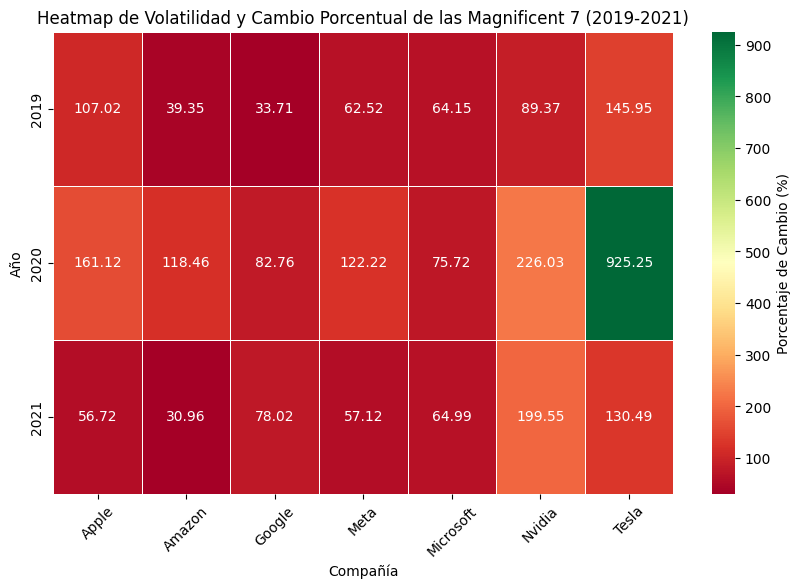

In [40]:
# Filtrar las columnas que contienen el porcentaje de cambio
percent_change_columns = [
    'apple_percent_change', 'amazon_percent_change', 'google_percent_change',
    'meta_percent_change', 'microsoft_percent_change', 'nvidia_percent_change', 'tesla_percent_change'
]

# Crear un nuevo DataFrame con las columnas de porcentaje de cambio y el año
heatmap_data = covid_table[percent_change_columns + ['Year']].set_index('Year')

# Cambiar los nombres de las columnas para que se vean más claras en la heatmap
heatmap_data.columns = ['Apple', 'Amazon', 'Google', 'Meta', 'Microsoft', 'Nvidia', 'Tesla']

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Porcentaje de Cambio (%)'})

plt.title('Heatmap de Volatilidad y Cambio Porcentual de las Magnificent 7 (2019-2021)')
plt.xlabel('Compañía')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.show()

Lo aplico con colores distintos para mejorar la visualizacion

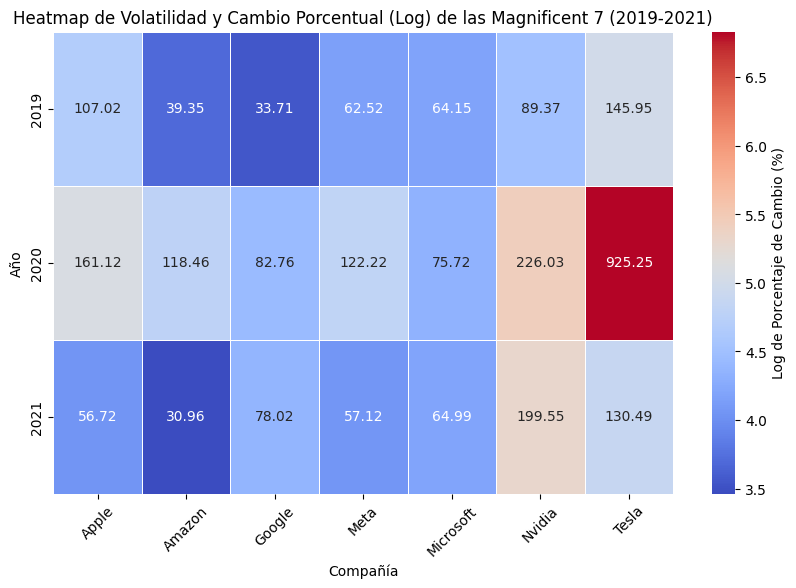

In [42]:
# Aplicar una escala logarítmica para manejar mejor los valores extremos
log_heatmap_data = np.log1p(heatmap_data)  # Log(1 + x) para evitar problemas con ceros

# Crear el heatmap ajustado
plt.figure(figsize=(10, 6))

sns.heatmap(log_heatmap_data, cmap='coolwarm', annot=heatmap_data, fmt=".2f", linewidths=.5,
            cbar_kws={'label': 'Log de Porcentaje de Cambio (%)'})

plt.title('Heatmap de Volatilidad y Cambio Porcentual (Log) de las Magnificent 7 (2019-2021)')
plt.xlabel('Compañía')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.show()

Verificando las columnas

In [34]:
apple_monthly.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

A lo largo que fui analizando los datos, y sintiendo que puede sustentar mi hipotesis, me parecio necesario agregar un grafico de porque hubo un declive fuerte los siguientes años de la pandemia, debido a problemas que se surgieron gracias a covid.

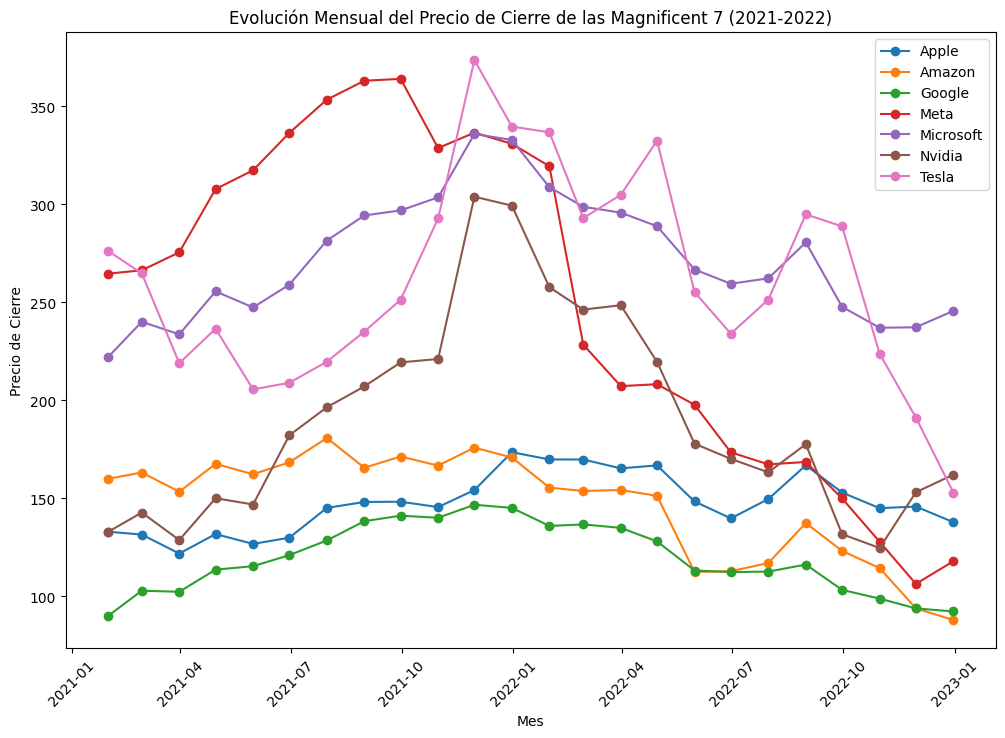

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los DataFrames mensuales para mostrar solo los años de 2021 a 2022 y hacer merge para graficar todas las compañías juntas
def filter_and_merge_monthly_data(df, company_name):
    df_filtered = df.loc['2021':'2022', ['Close']].copy()  # Filtrar solo los datos de 2021 a 2022
    df_filtered['Month'] = df_filtered.index  # Mantener el índice de meses
    df_filtered.columns = ['Close', 'Month']  # Renombrar las columnas
    df_filtered['Company'] = company_name  # Añadir la compañía
    return df_filtered

# Aplicar la función a cada compañía mensual
apple_monthly_filtered = filter_and_merge_monthly_data(apple_monthly, 'Apple')
amazon_monthly_filtered = filter_and_merge_monthly_data(amazon_monthly, 'Amazon')
google_monthly_filtered = filter_and_merge_monthly_data(google_monthly, 'Google')
meta_monthly_filtered = filter_and_merge_monthly_data(meta_monthly, 'Meta')
microsoft_monthly_filtered = filter_and_merge_monthly_data(microsoft_monthly, 'Microsoft')
nvidia_monthly_filtered = filter_and_merge_monthly_data(nvidia_monthly, 'Nvidia')
tesla_monthly_filtered = filter_and_merge_monthly_data(tesla_monthly, 'Tesla')

# Combinar todos los DataFrames filtrados en uno solo
merged_monthly = pd.concat([apple_monthly_filtered, amazon_monthly_filtered, google_monthly_filtered,
                            meta_monthly_filtered, microsoft_monthly_filtered, nvidia_monthly_filtered,
                            tesla_monthly_filtered])

# Graficar todas las compañías en un solo gráfico mensual
plt.figure(figsize=(12, 8))

# Graficar cada compañía
for company in merged_monthly['Company'].unique():
    company_data = merged_monthly[merged_monthly['Company'] == company]
    plt.plot(company_data['Month'], company_data['Close'], marker='o', linestyle='-', label=company)

# Configurar el gráfico
plt.title('Evolución Mensual del Precio de Cierre de las Magnificent 7 (2021-2022)')
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()


Otro grafico que me parecio interesante agregar es la correlacion que hay entre una compañia y la otra, demostrando que las 7 suelen llevar una misma tendencia

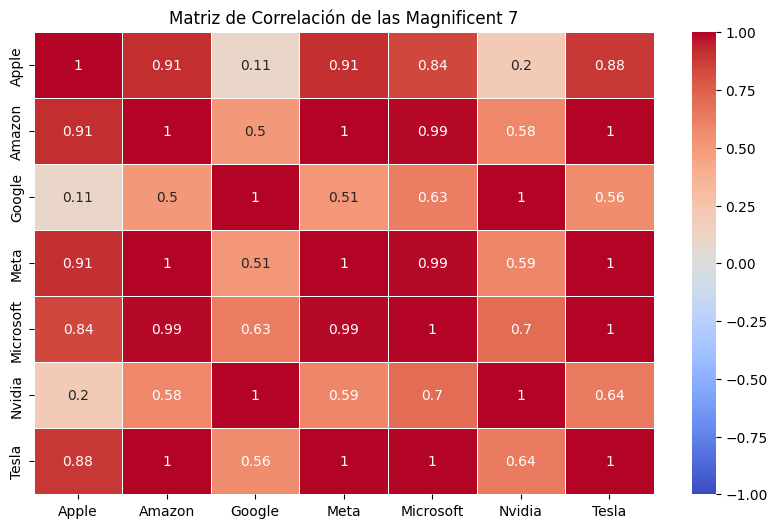

In [44]:

# Valores cercanos a 1: Indican que las compañías tienden a moverse juntas (positivamente correlacionadas).
# Valores cercanos a -1: Indican que las compañías tienden a moverse en direcciones opuestas (negativamente correlacionadas).
# Valores cercanos a 0: Indican poca o ninguna relación entre las compañías.

# Crear un nuevo DataFrame con los precios de cierre de cada compañía
closing_prices = covid_table[['apple_percent_change', 'amazon_percent_change', 'google_percent_change',
                              'meta_percent_change', 'microsoft_percent_change', 'nvidia_percent_change',
                              'tesla_percent_change']]

# Renombrar las columnas para que sean más claras
closing_prices.columns = ['Apple', 'Amazon', 'Google', 'Meta', 'Microsoft', 'Nvidia', 'Tesla']

# Calcular la matriz de correlación
correlation_matrix = closing_prices.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Configurar el gráfico
plt.title('Matriz de Correlación de las Magnificent 7')
plt.show()
